In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import pickle

In [243]:
# Read in the dataset
Customers = pd.read_csv("D:\\Data Science\\Python.VS\\sownd\\project 2 Dataspark Global Electronics\\csv files\\Customers.csv", encoding='latin-1')
print(Customers.info())
print(Customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None
CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64


In [245]:
Customers['Birthday'] = pd.to_datetime(Customers['Birthday'])

Customers['State Code'] = Customers['State Code'].fillna(method='bfill')

print(Customers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB
None


C:\Users\SOWNDHARYA SRINATH\AppData\Local\Temp\ipykernel_55472\1738078225.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Customers['State Code'] = Customers['State Code'].fillna(method='bfill')


In [246]:
empty_state_code_rows = Customers[Customers['State Code'].isnull()]
print(empty_state_code_rows)

Empty DataFrame
Columns: [CustomerKey, Gender, Name, City, State Code, State, Zip Code, Country, Continent, Birthday]
Index: []


In [247]:
Customers['Birthday'] = pd.to_datetime(Customers['Birthday'],errors='coerce')
Customers['Age'] = dt.datetime.now()  - Customers['Birthday']
Customers['Age'] = Customers['Age'].dt.days // 365


print(Customers.describe())

# Unique values in categorical columns
print(Customers['Gender'].value_counts())
print(Customers['State'].value_counts())
print(Customers['Country'].value_counts())

# Distribution of numerical columns (if applicable)
sns.histplot(Customers['Age'])  # Assuming 'Age' is calculated
plt.title('Age Distribution')
plt.show()

# Correlation matrix (if applicable)
numerical_cols = Customers.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

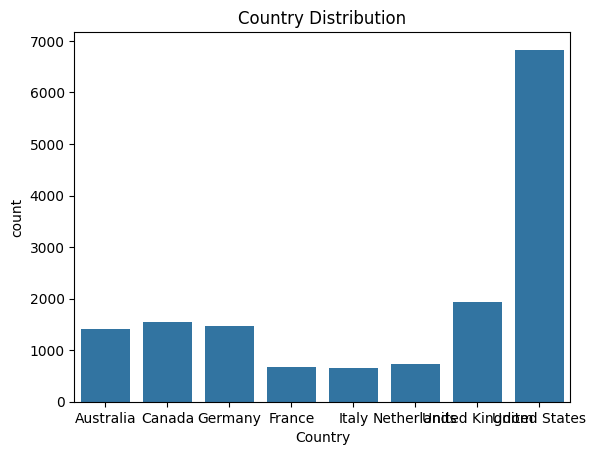

In [248]:
sns.countplot(x='Country', data=Customers)
plt.title('Country Distribution')
plt.show()

In [249]:
Customers.to_csv('Customers1.csv', index=False)

Products

In [250]:
# Read in the dataset
Products= pd.read_csv("D:\Data Science\Python.VS\sownd\project 2 Dataspark Global Electronics\csv files\Products.csv")
print(Products.info())
print(Products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None
ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [251]:
Products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [252]:
Products['Unit Cost USD'] = Products['Unit Cost USD'].str.replace(r'[^\d.]', '', regex=True)
Products['Unit Price USD'] = Products['Unit Price USD'].str.replace(r'[^\d.]', '', regex=True)

In [253]:
Products['Unit Cost USD'] = pd.to_numeric(Products['Unit Cost USD'],errors='coerce')
Products['Unit Price USD'] = pd.to_numeric(Products['Unit Price USD'],errors='coerce')

In [254]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


Brand
Contoso                 710
Fabrikam                267
Litware                 264
Proseware               244
Southridge Video        192
Adventure Works         192
Wide World Importers    173
The Phone Company       152
Tailspin Toys           144
A. Datum                132
Northwind Traders        47
Name: count, dtype: int64


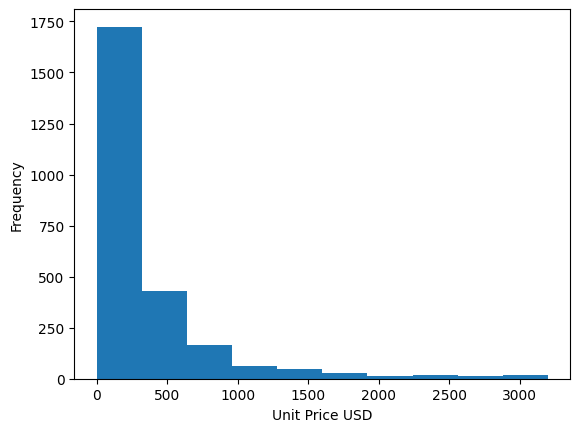

In [255]:
print(Products['Brand'].value_counts())

# Visualization

plt.hist(Products['Unit Price USD'])
plt.xlabel('Unit Price USD')
plt.ylabel('Frequency')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Contoso'),
  Text(1, 0, 'Fabrikam'),
  Text(2, 0, 'Litware'),
  Text(3, 0, 'Proseware'),
  Text(4, 0, 'Southridge Video'),
  Text(5, 0, 'Adventure Works'),
  Text(6, 0, 'Wide World Importers'),
  Text(7, 0, 'The Phone Company'),
  Text(8, 0, 'Tailspin Toys'),
  Text(9, 0, 'A. Datum'),
  Text(10, 0, 'Northwind Traders')])

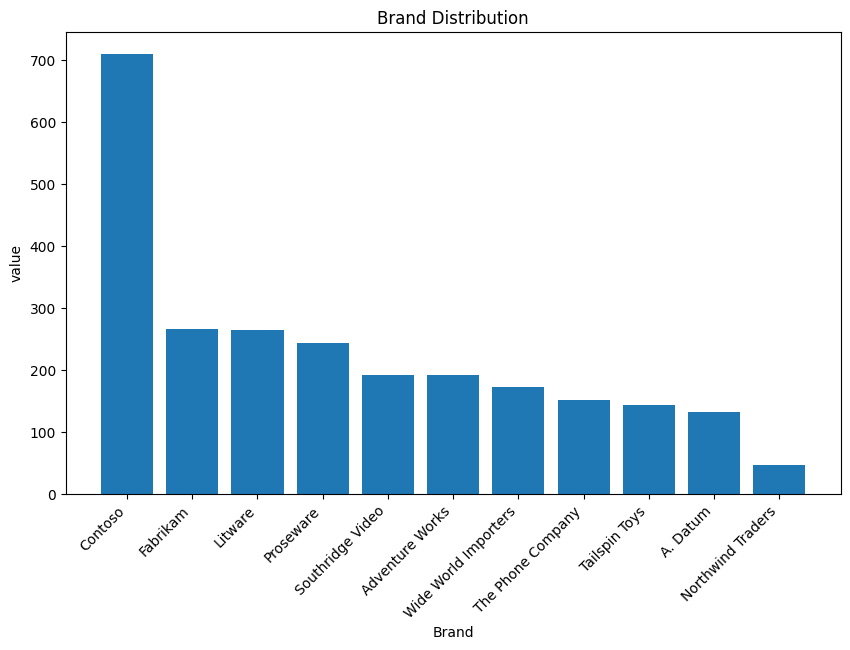

In [256]:
plt.figure(figsize=(10, 6))
plt.bar(Products['Brand'].value_counts().index, Products['Brand'].value_counts())
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('value')
plt.xticks(rotation=45, ha='right')

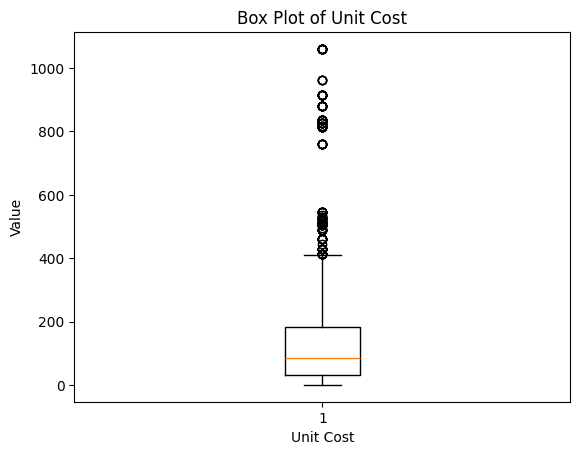

In [257]:
import matplotlib.pyplot as plt

plt.boxplot(Products['Unit Cost USD'])
plt.xlabel('Unit Cost')
plt.ylabel('Value')
plt.title('Box Plot of Unit Cost')
plt.show()

In [258]:

q1 = Products['Unit Cost USD'].quantile(0.25)
q3 = Products['Unit Cost USD'].quantile(0.75)
iqr = q3 - q1  #interquartilerange
outliers = Products[(Products['Unit Cost USD'] < (q1 - 1.5 * iqr)) | (Products['Unit Cost USD'] > (q3 + 1.5 * iqr))]
if not outliers.empty:
    print("Outliers found in Unit Cost:")
    print(outliers)

outlier_count=len(outliers)
print(outlier_count)


Outliers found in Unit Cost:
      ProductKey                                       Product Name  \
144          145           Adventure Works 52" LCD HDTV X590 Silver   
145          146            Adventure Works 52" LCD HDTV X590 Black   
146          147            Adventure Works 52" LCD HDTV X590 White   
147          148            Adventure Works 52" LCD HDTV X590 Brown   
156          157    Adventure Works 37" 1080p LCD HDTV M150W Silver   
...          ...                                                ...   
2157        2158  Adventure Works Coffee Maker Super-Auto 12C X1...   
2163        2164    Fabrikam Coffee Maker Super-Auto 12C X125 Black   
2169        2170   Fabrikam Coffee Maker Super-Auto 12C X125 Silver   
2175        2176    Fabrikam Coffee Maker Super-Auto 12C X125 White   
2181        2182     Fabrikam Coffee Maker Super-Auto 12C X125 Grey   

                Brand   Color  Unit Cost USD  Unit Price USD  SubcategoryKey  \
144   Adventure Works  Silver         

In [259]:
def winsorize(data, lower_percentile=0.25, upper_percentile=0.75):
  lower_bound = data.quantile(lower_percentile)
  upper_bound = data.quantile(upper_percentile)
  data = np.clip(data, lower_bound, upper_bound)
  return data

# Example usage:
Products['Unit Cost USD'] = winsorize(Products['Unit Cost USD'], lower_percentile=0.05, upper_percentile=0.95)
Products['Unit Cost USD']

0        6.62
1        6.62
2        7.40
3       11.00
4       11.00
        ...  
2512    43.07
2513    43.07
2514     6.60
2515     6.60
2516     6.60
Name: Unit Cost USD, Length: 2517, dtype: float64

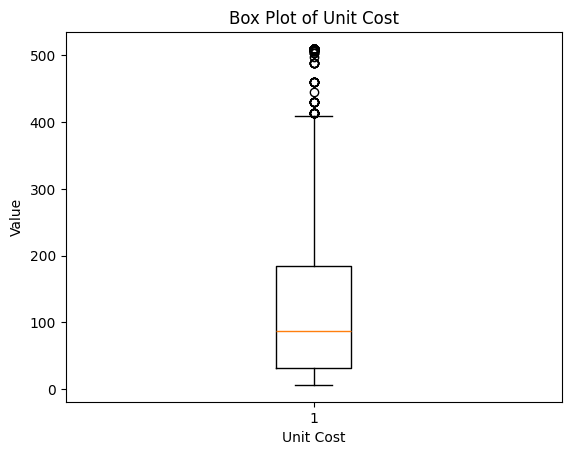

In [260]:
import matplotlib.pyplot as plt

plt.boxplot(Products['Unit Cost USD'])
plt.xlabel('Unit Cost')
plt.ylabel('Value')
plt.title('Box Plot of Unit Cost')
plt.show()

In [261]:

q1 = Products['Unit Price USD'].quantile(0.25)
q3 = Products['Unit Price USD'].quantile(0.75)
iqr = q3 - q1  #interquartilerange
outliers = Products[(Products['Unit Price USD'] < (q1 - 1.5 * iqr)) | (Products['Unit Price USD'] > (q3 + 1.5 * iqr))]
if not outliers.empty:
    print("Outliers found in Unit Price:")
    print(outliers)

outlier_count=len(outliers)
print(outlier_count)

Outliers found in Unit Price:
      ProductKey                                       Product Name  \
144          145           Adventure Works 52" LCD HDTV X590 Silver   
145          146            Adventure Works 52" LCD HDTV X590 Black   
146          147            Adventure Works 52" LCD HDTV X590 White   
147          148            Adventure Works 52" LCD HDTV X590 Brown   
148          149           Adventure Works 40" LCD HDTV M690 Silver   
...          ...                                                ...   
2157        2158  Adventure Works Coffee Maker Super-Auto 12C X1...   
2163        2164    Fabrikam Coffee Maker Super-Auto 12C X125 Black   
2169        2170   Fabrikam Coffee Maker Super-Auto 12C X125 Silver   
2175        2176    Fabrikam Coffee Maker Super-Auto 12C X125 White   
2181        2182     Fabrikam Coffee Maker Super-Auto 12C X125 Grey   

                Brand   Color  Unit Cost USD  Unit Price USD  SubcategoryKey  \
144   Adventure Works  Silver        

In [262]:
def winsorize(data, lower_percentile=0.25, upper_percentile=0.75):
  lower_bound = data.quantile(lower_percentile)
  upper_bound = data.quantile(upper_percentile)
  data = np.clip(data, lower_bound, upper_bound)
  return data

# Example usage:
Products['Unit Price USD'] = winsorize(Products['Unit Price USD'], lower_percentile=0.05, upper_percentile=0.95)
Products['Unit Price USD']

0        13.00
1        13.00
2        14.52
3        21.57
4        21.57
         ...  
2512    129.99
2513    129.99
2514     13.00
2515     13.00
2516     13.00
Name: Unit Price USD, Length: 2517, dtype: float64

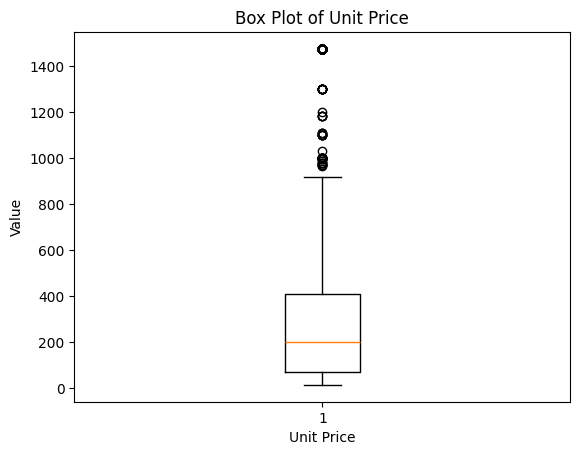

In [263]:

plt.boxplot(Products['Unit Price USD'])
plt.xlabel('Unit Price')
plt.ylabel('Value')
plt.title('Box Plot of Unit Price')
plt.show()

In [264]:
Products['Profit'] = Products['Unit Price USD'] - Products['Unit Cost USD']
Products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,13.00,101,MP4&MP3,1,Audio,6.38
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,13.00,101,MP4&MP3,1,Audio,6.38
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio,7.12
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio,10.57
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio,10.57
...,...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones,86.92
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones,86.92
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,6.60,13.00,505,Cell phones Accessories,5,Cell phones,6.40
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,6.60,13.00,505,Cell phones Accessories,5,Cell phones,6.40


In [265]:
Products.to_csv('Products1.csv', index=False)

Stores

In [266]:
# Read in the dataset
Stores= pd.read_csv("D:\Data Science\Python.VS\sownd\project 2 Dataspark Global Electronics\csv files\Stores.csv")
print(Stores.info())
print(Stores.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None
StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64


In [267]:
Stores['Open Date']=pd.to_datetime(Stores['Open Date'],errors='coerce')

In [268]:
Stores.dropna(subset=['Square Meters'], inplace=True)

In [269]:
Stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       66 non-null     int64         
 1   Country        66 non-null     object        
 2   State          66 non-null     object        
 3   Square Meters  66 non-null     float64       
 4   Open Date      66 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [270]:
Stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
61,62,United States,South Dakota,1120.0,2018-06-03
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01


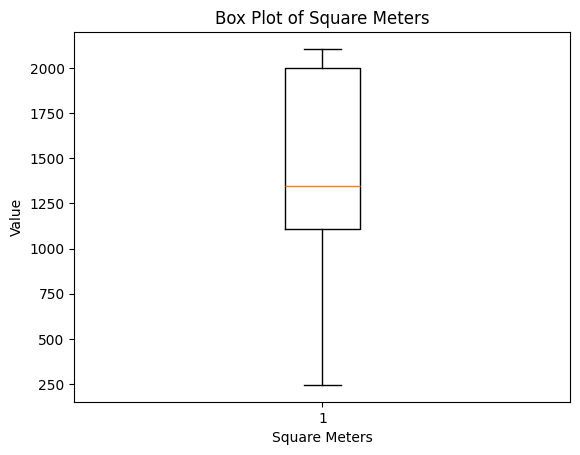

In [271]:
plt.boxplot(Stores['Square Meters'])
plt.xlabel('Square Meters')
plt.ylabel('Value')
plt.title('Box Plot of Square Meters')
plt.show()

In [272]:
q1 = Stores['Square Meters'].quantile(0.25)
q3 = Stores['Square Meters'].quantile(0.75)
iqr = q3 - q1  #interquartilerange
outliers = Stores[(Stores['Square Meters'] < (q1 - 1.5 * iqr)) | (Stores['Square Meters']> (q3 + 1.5 * iqr))]
if not outliers.empty:
    print("Outliers found in Square Meters:")
    print(outliers)

outlier_count=len(outliers)
print(outlier_count)

0


In [273]:
Stores.to_csv('Stores1.csv', index=False)

Exchange_Rates

In [274]:
Exchange_Rates= pd.read_csv("D:\Data Science\Python.VS\sownd\project 2 Dataspark Global Electronics\csv files\Exchange_Rates.csv")
print(Exchange_Rates.info())
print(Exchange_Rates.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB
None
Date        0
Currency    0
Exchange    0
dtype: int64


In [275]:
Exchange_Rates['Date']=pd.to_datetime(Exchange_Rates['Date'],errors='coerce')

In [276]:
print(Exchange_Rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB
None


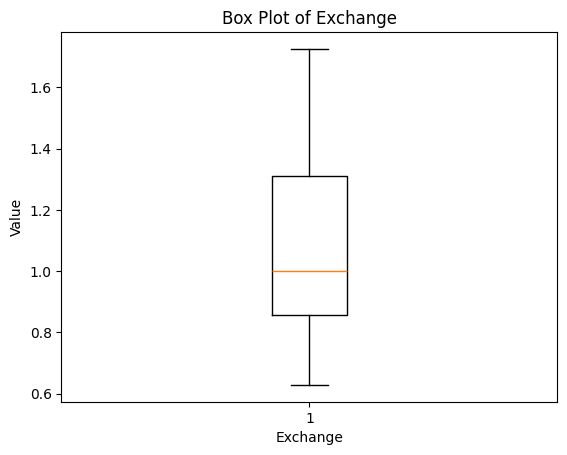

In [277]:

plt.boxplot(Exchange_Rates['Exchange'])
plt.xlabel('Exchange')
plt.ylabel('Value')
plt.title('Box Plot of Exchange')
plt.show()

In [278]:
Q1 = Exchange_Rates['Exchange'].quantile(0.25)
Q3 = Exchange_Rates['Exchange'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers1 = Exchange_Rates[(Exchange_Rates['Exchange'] < lower_bound) | (Exchange_Rates['Exchange'] > upper_bound)]
if not outliers1.empty:
    print("Outliers found in Exchange:")
    print(outliers)
else:
    print("No outliers found in Exchange")

No outliers found in Exchange


In [279]:
Exchange_Rates.to_csv('Exchange_Rates1.csv', index=False)

Sales

In [280]:
# Read in the dataset
sales = pd.read_csv("D:\Data Science\Python.VS\sownd\project 2 Dataspark Global Electronics\csv files\Sales.csv")
print(sales.info())
print(sales.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None
Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64


In [281]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'], errors='coerce')


In [282]:
sales['Delivery Date'] = sales['Delivery Date'].fillna(0)
print(sales.info())
print(sales.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  object        
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 4.3+ MB
None
Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64


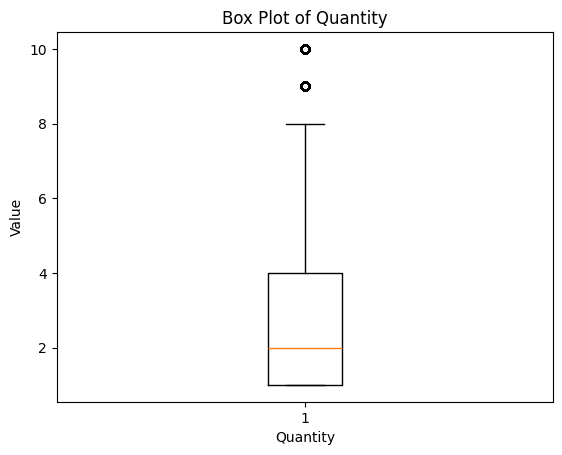

In [284]:
import matplotlib.pyplot as plt

plt.boxplot(sales['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Box Plot of Quantity')
plt.show()

In [285]:

q1 = sales['Quantity'].quantile(0.25)
q3 = sales['Quantity'].quantile(0.75)
iqr = q3 - q1  #interquartilerange
outliers = sales[(sales['Quantity'] < (q1 - 1.5 * iqr)) | (sales['Quantity'] > (q3 + 1.5 * iqr))]
if not outliers.empty:
    print("Outliers found in Quantity:")
    print(outliers)

outlier_count=len(outliers)
print(outlier_count)

Outliers found in Quantity:
       Order Number  Line Item Order Date        Delivery Date  CustomerKey  \
11           366008          1 2016-01-01                    0       759705   
34           367005          4 2016-01-02  2016-01-10 00:00:00       758280   
40           367007          2 2016-01-02                    0      1730985   
99           369000          1 2016-01-04                    0      1143828   
132          370010          2 2016-01-05                    0      1393738   
...             ...        ...        ...                  ...          ...   
62567       2237000          2 2021-02-14  2021-02-17 00:00:00      1883820   
62646       2240004          2 2021-02-17                    0      1541524   
62738       2241014          4 2021-02-18                    0       359587   
62788       2242010          1 2021-02-19  2021-02-24 00:00:00      1268170   
62807       2243000          3 2021-02-20                    0       723572   

       StoreKey  Produc

In [286]:

#To process outliers found in quantity
def winsorize(data, lower_percentile=0.25, upper_percentile=0.75):
  lower_bound = data.quantile(lower_percentile)
  upper_bound = data.quantile(upper_percentile)
  data = np.clip(data, lower_bound, upper_bound)
  return data

# Example usage:
sales['Quantity'] = winsorize(sales['Quantity'], lower_percentile=0.05, upper_percentile=0.95)
sales['Quantity']

0        1
1        2
2        1
3        7
4        1
        ..
62879    3
62880    4
62881    2
62882    2
62883    7
Name: Quantity, Length: 62884, dtype: int64

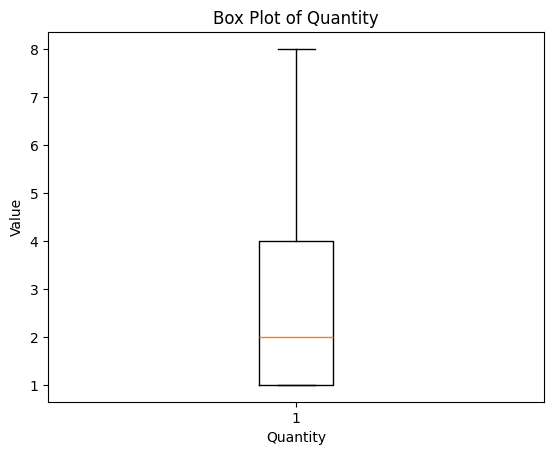

In [287]:
plt.boxplot(sales['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Box Plot of Quantity')
plt.show()

In [288]:
sales.to_csv('Sales1.csv', index=False)

Merging datasets

In [5]:
import pandas as pd

# Load the cleaned datasets
Customers1 = pd.read_csv('Customers1.csv')
Products1 = pd.read_csv('Products1.csv')
Stores1 = pd.read_csv('Stores1.csv')
Exchange_Rates1 = pd.read_csv('Exchange_Rates1.csv')
Sales1 = pd.read_csv('Sales1.csv')

In [6]:


Exchange_Rates1 = Exchange_Rates1.rename(columns={'Currency': 'Currency Code'})

Exchange_Rates1 = Exchange_Rates1.rename(columns={'Date': 'Order Date'})




In [7]:
# Merge Sales with Customers, Products, and Stores
merged_df = Sales1.merge(Customers1, on='CustomerKey')
merged_df = merged_df.merge(Products1, on='ProductKey')
merged_df = merged_df.merge(Stores1, on='StoreKey')
merged_df = merged_df.merge(Exchange_Rates1, on=['Currency Code', 'Order Date'])



In [8]:
# Assuming the correct column name is 'Order Date' (without space)
merged_df['Open Date'] = pd.to_datetime(merged_df['Open Date'], errors='coerce')
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])
merged_df['Birthday'] = pd.to_datetime(merged_df['Birthday'])



In [9]:
duplicate_rows = merged_df[merged_df.duplicated()]

In [10]:
print(duplicate_rows)

Empty DataFrame
Columns: [Order Number, Line Item, Order Date, Delivery Date, CustomerKey, StoreKey, ProductKey, Quantity, Currency Code, Gender, Name, City, State Code, State_x, Zip Code, Country_x, Continent, Birthday, Age, Product Name, Brand, Color, Unit Cost USD, Unit Price USD, SubcategoryKey, Subcategory, CategoryKey, Category, Profit, Country_y, State_y, Square Meters, Open Date, Exchange]
Index: []

[0 rows x 34 columns]


In [11]:
merged_df.drop(columns=['Delivery Date'], inplace=True)

le = LabelEncoder()
 # Encode categorical variables
merged_df['Category'] = le.fit_transform(merged_df['Category'])
merged_df['Subcategory'] = le.fit_transform(merged_df['Subcategory'])
merged_df['City'] = le.fit_transform(merged_df['City'])
merged_df['Country_x'] = le.fit_transform(merged_df['Country_x'])
merged_df['Country_y'] = le.fit_transform(merged_df['Country_y'])
merged_df['State_x'] = le.fit_transform(merged_df['State_x'])
merged_df['State_y'] = le.fit_transform(merged_df['State_y'])
merged_df['Continent'] = le.fit_transform(merged_df['Continent'])
merged_df['Product Name'] = le.fit_transform(merged_df['Product Name'])
merged_df['Brand'] = le.fit_transform(merged_df['Brand'])
merged_df['Gender'] = le.fit_transform(merged_df['Gender'])
merged_df['Color'] = le.fit_transform(merged_df['Color'])

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [33]:
print(merged_df.head())

   Order Number  Line Item Order Date  CustomerKey  StoreKey  ProductKey  \
0        366000          1 2016-01-01       265598        10        1304   
1        366004          1 2016-01-01      1107461        38         163   
2        366004          2 2016-01-01      1107461        38        1529   
3        366005          1 2016-01-01       844003        33         421   
4        366007          1 2016-01-01      2035771        43        1617   

   Quantity Currency Code  Gender            Name  ... SubcategoryKey  \
0         1           CAD    Male    Tyler Vaught  ...            406   
1         6           GBP    Male      Sam Nelson  ...            201   
2         2           GBP    Male      Sam Nelson  ...            504   
3         4           EUR    Male  Ouassim Heuver  ...            303   
4         1           USD  Female  Damiana Corona  ...            602   

                        Subcategory CategoryKey  \
0  Cameras & Camcorders Accessories           4   
1 

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49719 entries, 0 to 49718
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    49719 non-null  int64         
 1   Line Item       49719 non-null  int64         
 2   Order Date      49719 non-null  datetime64[ns]
 3   CustomerKey     49719 non-null  int64         
 4   StoreKey        49719 non-null  int64         
 5   ProductKey      49719 non-null  int64         
 6   Quantity        49719 non-null  int64         
 7   Currency Code   49719 non-null  object        
 8   Gender          49719 non-null  object        
 9   Name            49719 non-null  object        
 10  City            49719 non-null  object        
 11  State Code      49719 non-null  object        
 12  State_x         49719 non-null  object        
 13  Zip Code        49719 non-null  object        
 14  Country_x       49719 non-null  object        
 15  Co

In [13]:
merged_df.to_csv('Final.csv',index=False)

#Connecting to SQL and uploading the database

In [2]:
import pandas as pd
import pymysql

# Read the CSV file
data = pd.read_csv("D:\Data Science\Python.VS\sownd\project 2 Dataspark Global Electronics\Final.csv")

# Connect to MySQL database
mydb = pymysql.connect(
    host='localhost',
    user="root",
    password="",
    database="project data_spark"
)

mycursor = mydb.cursor()
mydb.commit()

In [3]:


# Create table if not exists
create_table_query = """
CREATE TABLE IF NOT EXISTS Data_Spark (
    `Order Number` VARCHAR(255),
    `Line Item` VARCHAR(255),
    `Order Date` DATE,
    `CustomerKey` INT,
    `StoreKey` INT,
    `ProductKey` INT,
    `Quantity` INT,
    `Currency Code` VARCHAR(10),
    `Gender` VARCHAR(10),
    `Name` VARCHAR(255),
    `City` VARCHAR(255),
    `State Code` VARCHAR(10),
    `State_x` VARCHAR(255),
    `Zip Code` VARCHAR(10),
    `Country_x` VARCHAR(255),
    `Continent` VARCHAR(255),
    `Birthday` DATE,
    `Age` INT,
    `Product Name` VARCHAR(255),
    `Brand` VARCHAR(255),
    `Color` VARCHAR(50),
    `Unit Cost USD` FLOAT,
    `Unit Price USD` FLOAT,
    `SubcategoryKey` INT,
    `Subcategory` VARCHAR(255),
    `CategoryKey` INT,
    `Category` VARCHAR(255),
    `Profit` FLOAT,
    `Country_y` VARCHAR(255),
    `State_y` VARCHAR(255),
    `Square Meters` FLOAT,
    `Open Date` DATE,
    `Exchange` VARCHAR(50)
)
"""
mycursor.execute(create_table_query)

0

In [15]:
for index, row in merged_df.iterrows():
    sql = """
        INSERT INTO data_spark (
            `Order Number`, `Line Item`, `Order Date`, `CustomerKey`, `StoreKey`, `ProductKey`, `Quantity`,
            `Currency Code`, `Gender`, `Name`, `City`, `State Code`, `State_x`, `Zip Code`, `Country_x`, `Continent`,
            `Birthday`, `Age`, `Product Name`, `Brand`, `Color`, `Unit Cost USD`, `Unit Price USD`, `SubcategoryKey`,
            `Subcategory`, `CategoryKey`, `Category`, `Profit`, `Country_y`, `State_y`, `Square Meters`, `Open Date`, `Exchange`
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """

    mycursor.execute(sql, tuple(row))

# Commit changes
mydb.commit()

# Close the connection
mycursor.close()
mydb.close()

: 

In [8]:



#Gender distribution
query1="""SELECT Gender, COUNT(*) AS TotalCustomers
FROM data_spark
GROUP BY Gender;"""

mycursor.execute(query1)
gender_results = mycursor.fetchall()

#Age distribution (assuming 'Birthday' is a DATE column)
query2="""SELECT COUNT(*) AS TotalCustomers, MIN(Age) AS MinAge, MAX(Age) AS MaxAge, AVG(Age) AS AvgAge
FROM data_spark
WHERE Age IS NOT NULL;"""

mycursor.execute(query2)
age_results = mycursor.fetchall()

#Location distribution
query3="""SELECT Country_x, COUNT(*) AS TotalCustomers
FROM data_spark
GROUP BY Country_x;"""

mycursor.execute(query3)
location_results = mycursor.fetchall()


print("Gender Distribution:")
for row in gender_results:
    print(row)

print("\nAge Distribution:")
for row in age_results:
    print(row)

print("\nLocation Distribution:")
for row in location_results:
    print(row)




Gender Distribution:
('0', 24537)
('1', 25182)

Age Distribution:
(49719, 22, 89, Decimal('55.2786'))

Location Distribution:
('0', 2248)
('1', 4206)
('2', 1387)
('3', 4662)
('4', 2201)
('5', 1817)
('6', 6643)
('7', 26555)


In [13]:
# Preferred products
query4="""SELECT ProductKey, COUNT(*) AS ProductPopularity
FROM data_spark
GROUP BY ProductKey
ORDER BY ProductPopularity DESC;"""

mycursor.execute(query4)
propop_results = mycursor.fetchall()

print("\nProduct Popularity:")
for row in propop_results:
    print(row)


Product Popularity:
(436, 128)
(440, 128)
(448, 127)
(423, 127)
(458, 127)
(416, 127)
(424, 126)
(446, 124)
(417, 122)
(450, 121)
(418, 120)
(445, 120)
(422, 120)
(425, 118)
(453, 118)
(433, 118)
(439, 114)
(421, 114)
(457, 114)
(452, 114)
(437, 114)
(427, 113)
(451, 113)
(57, 113)
(434, 112)
(460, 112)
(435, 112)
(456, 111)
(438, 110)
(444, 109)
(419, 107)
(428, 107)
(432, 106)
(443, 106)
(454, 105)
(431, 105)
(442, 105)
(449, 105)
(426, 105)
(430, 105)
(459, 104)
(420, 104)
(447, 103)
(1609, 102)
(455, 102)
(65, 101)
(429, 100)
(1597, 98)
(53, 97)
(1625, 97)
(1629, 96)
(1616, 96)
(1641, 95)
(1648, 95)
(1613, 93)
(1596, 93)
(1652, 93)
(1614, 93)
(1649, 92)
(114, 92)
(1594, 92)
(1636, 92)
(1638, 92)
(1573, 91)
(1578, 91)
(51, 91)
(56, 90)
(1619, 90)
(1602, 89)
(441, 89)
(58, 88)
(60, 87)
(1601, 87)
(1622, 87)
(1643, 86)
(1586, 86)
(64, 86)
(48, 86)
(69, 85)
(1645, 85)
(1621, 85)
(1646, 85)
(1631, 85)
(1655, 85)
(1660, 85)
(1632, 84)
(1644, 84)
(1617, 84)
(1637, 84)
(47, 84)
(61, 84)
(

In [14]:



#Frequency of purchases
query5="""SELECT CustomerKey, COUNT(*) AS PurchaseFrequency
FROM data_spark
GROUP BY CustomerKey;"""

mycursor.execute(query5)
purfreq_results = mycursor.fetchall()


print("\nPurchase Frequency:")
for row in purfreq_results:
    print(row)




Purchase Frequency:
(325, 5)
(554, 3)
(1042, 3)
(1314, 5)
(1568, 5)
(1585, 4)
(1626, 4)
(1642, 1)
(1863, 8)
(2238, 3)
(2248, 2)
(2435, 2)
(2469, 2)
(2512, 5)
(2792, 1)
(3002, 3)
(3203, 4)
(3327, 3)
(3575, 1)
(4174, 2)
(5097, 1)
(5445, 1)
(5962, 8)
(6258, 3)
(6308, 3)
(7109, 2)
(7566, 3)
(7783, 1)
(8098, 3)
(8181, 2)
(8945, 3)
(9184, 4)
(9812, 6)
(9915, 4)
(10039, 1)
(10299, 2)
(10393, 1)
(11035, 1)
(12160, 6)
(12365, 2)
(12649, 1)
(12729, 5)
(12859, 2)
(13045, 2)
(13071, 2)
(13365, 1)
(14069, 1)
(14180, 2)
(14906, 3)
(14962, 6)
(14988, 5)
(15391, 3)
(15718, 6)
(16716, 3)
(17412, 3)
(17811, 3)
(18309, 2)
(18470, 3)
(18887, 3)
(19082, 5)
(19207, 1)
(19404, 2)
(19534, 3)
(19753, 3)
(20069, 8)
(20092, 5)
(20237, 6)
(20623, 5)
(21203, 1)
(21424, 5)
(21460, 6)
(21523, 4)
(21819, 3)
(22540, 3)
(23203, 9)
(23267, 2)
(23320, 1)
(25771, 3)
(25864, 5)
(26477, 6)
(26642, 2)
(26728, 2)
(27356, 3)
(27492, 10)
(27616, 6)
(28690, 1)
(29041, 2)
(29278, 1)
(29555, 3)
(29647, 3)
(29689, 6)
(29812, 2)
(2

In [15]:
#Purchase Patterns
# Average order value
query6="""SELECT AVG(Quantity) AS AvgOrderValue
FROM data_spark;"""

mycursor.execute(query6)
ordervalue_results = mycursor.fetchall()

print("\nAvg Order Value:")
for row in ordervalue_results:
    print(row)


Avg Order Value:
(Decimal('3.1033'),)


In [16]:
#SQL
#Segment customers by age group
query7="""SELECT CASE WHEN Age < 30 THEN 'Young'
            WHEN Age >= 30 AND Age < 45 THEN 'Middle-Aged'
            ELSE 'Senior' END AS AgeGroup, COUNT(*) AS TotalCustomers
FROM data_spark
GROUP BY AgeGroup;"""

mycursor.execute(query7)
agegrp_results = mycursor.fetchall()

print("\nAge group:")
for row in agegrp_results:
    print(row)


Age group:
('Middle-Aged', 11299)
('Senior', 32752)
('Young', 5668)


In [20]:
#Overall sales Performance
query8="""SELECT YEAR(Order Date) AS Year, MONTH(Order Date) AS Month, SUM(Quantity) AS TotalSales
FROM data_spark
GROUP BY YEAR(Order Date), MONTH(Order Date)
ORDER BY YEAR(Order Date), MONTH(Order Date);"""

mycursor.execute(query8)
overallsales_results = mycursor.fetchall()

print("\nOverall sales Performance:")
for row in overallsales_results:
    print(row)

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near 'Order Date) AS Year, MONTH(Order Date) AS Month, SUM(Quantity) AS TotalSales\n...' at line 1")

In [23]:

#Sales by Product
query9="""SELECT ProductName, SUM(Quantity) AS TotalQuantity, SUM(Quantity * Unit Price USD) AS TotalRevenue
FROM data_spark
GROUP BY ProductName
ORDER BY TotalQuantity DESC;"""

mycursor.execute(query9)
totalrevenue_results = mycursor.fetchall()

print("\nProduct Performance:")
for row in totalrevenue_results:
    print(row)

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near 'Price USD) AS TotalRevenue\nFROM data_spark\nGROUP BY ProductName\nORDER BY Tota...' at line 1")

In [ ]:
#Sales by Store
query="""SELECT StoreKey, SUM(Quantity * Unit Price USD) AS TotalSales
FROM data_spark
GROUP BY StoreKey
ORDER BY TotalSales DESC;"""

In [ ]:
#Sales by Currency
query="""SELECT CurrencyCode, SUM(Quantity * Unit Price USD) AS TotalSales, AVG(Exchange) AS AvgExchangeRate
FROM data_spark
GROUP BY CurrencyCode;"""

In [25]:

#Product

#Sales by Product Popularity
query10="""SELECT Product Name, SUM(Quantity) AS TotalQuantity
FROM data_spark
GROUP BY Product Name
ORDER BY TotalQuantity DESC;"""

mycursor.execute(query10)
total_results = mycursor.fetchall()

print("\nProduct Performance:")
for row in total_results:
    print(row)

ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near 'Name\nORDER BY TotalQuantity DESC' at line 3")

In [ ]:
#Profitability Analysis
query="""SELECT ProductName, (SUM(Quantity * Unit Price USD) - SUM(Quantity * Unit Cost USD)) / SUM(Quantity * Unit Price USD) AS ProfitMargin
FROM data_spark
GROUP BY ProductName;"""

In [ ]:
#Category Analysis
query="""SELECT Category, SUM(Quantity * Unit Price USD) AS TotalSales
FROM data_spark
GROUP BY Category
ORDER BY TotalSales DESC;"""

In [ ]:
#Store Analysis
#Store Performance
query="""SELECT StoreKey, SUM(Quantity * Unit Price USD) AS TotalSales, AVG(SquareMeters) AS AvgSquareMeters
FROM data_spark
GROUP BY StoreKey;"""

In [ ]:
#Geographical Analysis
query="""SELECT Country_x, SUM(Quantity * Unit Price USD) AS TotalSales
FROM data_spark
GROUP BY Country_x
ORDER BY TotalSales DESC;"""